Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.

Dataset Link -
https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is

timestamp. You can discard the timestamp column as in this case you may not need to use it.

Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has

several datasets. For this case study, we are using the Electronics dataset.

Please do the analysis based on steps( 1 to 8) as given below -

Steps -
Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

Build Popularity Recommender model.

Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

Build Collaborative Filtering model.

Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

Summarise your insights.

Please Note -
● If you are facing any memory issue while working on this project, create a small subset (Let’s say 10% of data) and work on it.

● If you are stuck at the model evaluation part of this project.

Please refer to below links -

https://surprise.readthedocs.io/en/stable/accuracy.html

http://surpriselib.com/ - Getting started, example

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
colnames=['UserId', 'ProductId', 'Ratings', 'Timestamp'] 
df = pd.read_csv("/content/drive/My Drive/My Colab Notebooks/ratings_Electronics.csv",names=colnames, header=None)

In [4]:
df.head()

,UserId,ProductId,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
df.shape

(7824482, 4)

In [0]:
#as suggested, dropping the timestamp column
df = df.drop('Timestamp', axis=1)

In [7]:
print("shape = ", df.shape)
print(df.head())

shape =  (7824482, 3)
           UserId   ProductId  Ratings
0   AKM1MP6P0OYPR  0132793040      5.0
1  A2CX7LUOHB2NDG  0321732944      5.0
2  A2NWSAGRHCP8N5  0439886341      1.0
3  A2WNBOD3WNDNKT  0439886341      3.0
4  A1GI0U4ZRJA8WN  0439886341      1.0


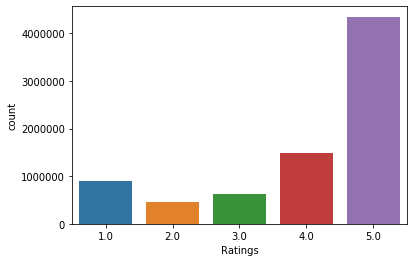

In [8]:
import seaborn as sns
sns.countplot(df['Ratings'])

In [9]:
missing_values = df.columns[df.isnull().any()]
print("missing values in column : ",missing_values)
any(df['Ratings']<0) # Any ratings less than 0 or negative

missing values in column :  Index([], dtype='object')


False

In [10]:
rating_range =df['Ratings'].unique()
sorted(rating_range)

[1.0, 2.0, 3.0, 4.0, 5.0]

In [11]:
df['Ratings'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Ratings, dtype: int64

**2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings)**

In [12]:
df1 = pd.DataFrame(df.groupby('UserId')['Ratings'].count().sort_values(ascending = False))
print(df1.shape)
print(df1.head())

(4201696, 1)
                Ratings
UserId                 
A5JLAU2ARJ0BO       520
ADLVFFE4VBT8        501
A3OXHLG6DIBRW8      498
A6FIAB28IS79        431
A680RUE1FDO8B       406


In [13]:
#converting UserID to feature column
df1.reset_index(inplace=True)
print(df1.head())
print(df1.shape)
print(df1.tail())

           UserId  Ratings
0   A5JLAU2ARJ0BO      520
1    ADLVFFE4VBT8      501
2  A3OXHLG6DIBRW8      498
3    A6FIAB28IS79      431
4   A680RUE1FDO8B      406
(4201696, 2)
                        UserId  Ratings
4201691         A3AAXY0TMZS72Y        1
4201692          A3AAXX0N47FFP        1
4201693         A3AAXWHVCN6VOG        1
4201694         A3AAXWDYVQ93SZ        1
4201695  A00000262KYZUE4J55XGL        1


In [14]:
# now get all userIDs who have given more than 50 ratings
df2 = df1.loc[df1['Ratings'] >= 50]

print(df2.head())
print(df2.shape)

           UserId  Ratings
0   A5JLAU2ARJ0BO      520
1    ADLVFFE4VBT8      501
2  A3OXHLG6DIBRW8      498
3    A6FIAB28IS79      431
4   A680RUE1FDO8B      406
(1540, 2)


**--Observations--**
From the results we can see we have about 1540 users who have rated more than 50 movies

In [0]:
# getting all entries from the original dataset for userIDs who have voted more than 50 movies
df_new = df[df['UserId'].isin(df2['UserId'])]

In [16]:
print(df_new.head())
print(df_new.shape)

             UserId   ProductId  Ratings
94   A3BY5KCNQZXV5U  0594451647      5.0
118   AT09WGFUM934H  0594481813      3.0
177  A32HSNCNPRUMTR  0970407998      1.0
178  A17HMM1M7T9PJ1  0970407998      4.0
492  A3CLWR1UUZT6TG  0972683275      5.0
(125871, 3)


In [0]:
#saving the new dataset
df_new.to_csv("/content/drive/My Drive/My Colab Notebooks/ratings_Electronics_1.csv")

# **3. Build Popularity Recommender model.**

### 1. Recommending Products based on most number of ratings


In [18]:
df_new.groupby('ProductId')['Ratings'].count().sort_values().head(10)

ProductId
0594451647    1
B004AAPKTW    1
B004AAZXQM    1
B004AB02IA    1
B004AB1OS2    1
B004AB35NY    1
B004AB3GJM    1
B004A9DHMK    1
B004AB715W    1
B004ABHKZ8    1
Name: Ratings, dtype: int64

In [19]:
df_new.groupby('ProductId')['Ratings'].count().sort_values(ascending = False).head(10)

ProductId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
B008DWCRQW    137
B00829THK0    137
B002R5AM7C    128
B004CLYEDC    118
B002SZEOLG    113
Name: Ratings, dtype: int64

### 2. Recommending Products based of top mean ratings

In [20]:
df_new.groupby('ProductId')['Ratings'].mean().head()

ProductId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: Ratings, dtype: float64

In [21]:
df_new.groupby('ProductId')['Ratings'].mean().sort_values(ascending = False).head(10)

ProductId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
B002R0T03Y    5.0
B002R20X9M    5.0
B002R2KACC    5.0
B002R4NN92    5.0
B002R5ABIW    5.0
Name: Ratings, dtype: float64

#**4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)**

In [22]:
!pip install surprise

     |████████████████████████████████| 6.5MB 2.9MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678217 sha256=73a0aa3783a12a173522c3ff47b1ec368c5479a98e4c3c2dfe1d895ef03aed18
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [23]:
import surprise as sup
print(sup.__version__)

1.1.0


In [0]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

# user-user Collaborative Filtering

In [25]:
print(df_new.head())
df_new.dtypes

             UserId   ProductId  Ratings
94   A3BY5KCNQZXV5U  0594451647      5.0
118   AT09WGFUM934H  0594481813      3.0
177  A32HSNCNPRUMTR  0970407998      1.0
178  A17HMM1M7T9PJ1  0970407998      4.0
492  A3CLWR1UUZT6TG  0972683275      5.0


UserId        object
ProductId     object
Ratings      float64
dtype: object

In [26]:
print(df_new['UserId'].nunique())
print(df_new['ProductId'].nunique())

1540
48190


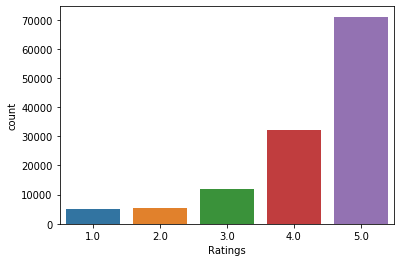

In [27]:
import seaborn as sns
sns.countplot(df_new['Ratings'])

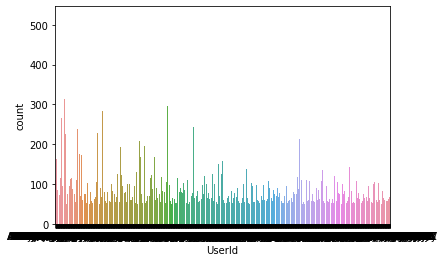

In [28]:
sns.countplot(df_new['UserId'])

In [0]:

reader = Reader(rating_scale=(1.0, 5.0))
dataset = Dataset.load_from_df(df_new[['UserId', 'ProductId', 'Ratings']], reader)
trainset, testset = train_test_split(dataset, test_size=.3)

In [51]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, min_k=20, sim_options={'name': 'cosine', 'user_based': True})
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [0]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [53]:
test_pred

[Prediction(uid='A1GYEGLX3P2Y7P', iid='B0097FZRYI', r_ui=5.0, est=4.3125, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='A3FEGTOLCWXSV4', iid='B00009UTZA', r_ui=4.0, est=4.008849557522124, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AG5WSXI52FPKH', iid='B002WM8ZV0', r_ui=5.0, est=4.055555555555555, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A9Y5O2R4D6EH5', iid='B004CLYEFK', r_ui=4.0, est=4.2683761391242845, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='A27QXQQOLAMRRR', iid='B000EXRSVM', r_ui=5.0, est=3.953846153846154, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='A3OXHLG6DIBRW8', iid='B004CLYEE6', r_ui=5.0, est=4.3931092490500045, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='A2Z2MUP8JRJXEU', iid='B00GE4MNQA', r_ui=5.0, est=4.264104688510822, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A26KXNN6H1IL0I'

In [54]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0249


1.0249353161726296

### Print Top 5 predictions for each user based on User - User Collaboration

In [55]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(test_pred, n=5)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A1GYEGLX3P2Y7P ['B004CLYEDC', 'B00834SJNA', 'B0097FZRYI', 'B002K9IHGI', 'B003XN24GY']
A3FEGTOLCWXSV4 ['B008EQZ25K', 'B003ES5ZUU', 'B00834SJSK', 'B004DUMU9W', 'B001H2VBD0']
AG5WSXI52FPKH ['B0029ZA5M2', 'B0028ACYMC', 'B000GGU09O', 'B002HK1AS2', 'B001KEQ2SE']
A9Y5O2R4D6EH5 ['B001TH7GSW', 'B004CLYE8C', 'B004CLYEFK', 'B000EOUYH6', 'B003R2NUCS']
A27QXQQOLAMRRR ['B000N99BBC', 'B001RHVS8I', 'B000PI6WG8', 'B000O6GI3S', 'B00E9N696S']
A3OXHLG6DIBRW8 ['B003ES5ZUU', 'B0002L5R78', 'B0081FLFQE', 'B004CLYEH8', 'B0074BW614']
A2Z2MUP8JRJXEU ['B0030B2O3M', 'B005DOK8NW', 'B005JACJ50', 'B002NEGTTW', 'B005CPGHAA']
A26KXNN6H1IL0I ['B0093H4VSS', 'B005BON4K8', 'B001EZYMF4', 'B003TJALAI', 'B000VIHFZ4']
A6KL17KKN0A5L ['B004WB8EYM', 'B00009XVCZ', 'B003GALRIA', 'B000X5ZVS8', 'B0035LBRJO']
A3QKIR8J56EUI1 ['B0040WMQ42', 'B003BYRQO0', 'B007RDAV02', 'B00K73NSXQ', 'B004O6MN7E']
A3FOSLM5G1BO63 ['B002ZB5P7K', 'B005AFVHLQ', 'B009NHWVIA', 'B0079UAT0A', 'B008ULPE70']
A203OCQQ12MAVT ['B003X7TRWE', 'B0017VRGXU', 'B003ES5ZR8',

# item-item Collaborative filtering

In [56]:
#loading the previously saved dataset(with ratings per userid more than 50)
df_item = pd.read_csv("/content/drive/My Drive/My Colab Notebooks/ratings_Electronics_1.csv")

df_item = df_item.drop([df_item.columns[0]],axis='columns')
df_item.head()

,UserId,ProductId,Ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,AT09WGFUM934H,0594481813,3.0
2,A32HSNCNPRUMTR,0970407998,1.0
3,A17HMM1M7T9PJ1,0970407998,4.0
4,A3CLWR1UUZT6TG,0972683275,5.0


In [35]:
print(df_item.shape)
print(df_item.dtypes)

(125871, 3)
UserId        object
ProductId     object
Ratings      float64
dtype: object


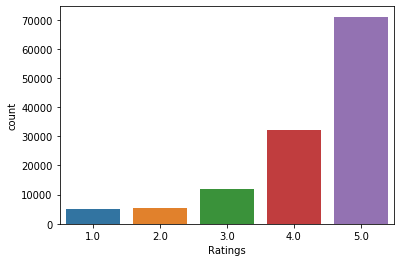

In [36]:
import seaborn as sns
sns.countplot(df_item['Ratings'])

In [37]:
df_item_2 = df_item.sample(frac=.50, random_state=2)
print(df_item_2.shape)

(62936, 3)


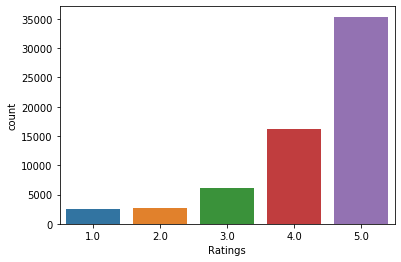

In [38]:
sns.countplot(df_item_2['Ratings'])

In [0]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1.0, 5.0))
dataset2 = Dataset.load_from_df(df_item_2[['UserId', 'ProductId', 'Ratings']], reader)
trainset, testset = train_test_split(dataset2, test_size=.3)

In [40]:
trainset.n_items

23897

In [41]:
print(type(trainset))
print(type(testset))

<class 'surprise.trainset.Trainset'>
<class 'list'>


In [42]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo2 = KNNWithMeans(k=20, min_k=5, sim_options={'name': 'cosine', 'user_based': False})
algo2.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [0]:
#run the trained model against the testset
test_pred_2=algo2.test(testset)

In [44]:

test_pred_2


[Prediction(uid='ABDR6IJ93HFIO', iid='B0072B9XPI', r_ui=5.0, est=4.258245375099308, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2HPJKM7L4EOQB', iid='B000EOL89Y', r_ui=3.0, est=4.258245375099308, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A6VPK7X53QNAQ', iid='B00BWL33H8', r_ui=4.0, est=4.545454545454546, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A2D1LPEUCTNT8X', iid='B004DBIKOK', r_ui=5.0, est=5.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2BGZ52M908MJY', iid='B00004VUM1', r_ui=4.0, est=4.258245375099308, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AOWF9T81XMX2S', iid='B003DKQB02', r_ui=4.0, est=5.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A14X244VGHWPSX', iid='B0019HGTLC', r_ui=5.0, est=5.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A

In [45]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_2,verbose=True)

User-based Model : Test Set
RMSE: 1.1316


1.1315990065426946

### Get top 5 predictions for each user based on item - item Collaboration

In [47]:
### Printing the top 5 predictions for each user based on item item collaboration filter
from collections import defaultdict
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n
top_n = get_top_n(test_pred, n=5)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3963R7EPE3A7E ['B000N99BBC', 'B005X9XVNQ', 'B000UN8MKM', 'B003FMVPFY', 'B0011TM19C']
A25UZ7MA72SMKM ['B00HFRWWAM', 'B000BQ7GW8', 'B004CLYEFK', 'B0045DPEHW', 'B004CLYEE6']
A1KWPIORLG2QV ['B00829THK0', 'B007HZLLOK', 'B0012IJYZQ', 'B004T9RR6I', 'B002ISZD2C']
A2F4HP0J5VNOYR ['B00009R6BK', 'B005TDWSJ4', 'B004OR14GY', 'B002QQ8H8I', 'B001XURPR2']
A1ZU55TM45Y2R8 ['B000B7C37K', 'B0030CHH2O', 'B006QOJ3YI', 'B004CLYEFK', 'B008X9ZBVI']
AVTJEWTCJ3PBE ['B00182CIB8', 'B003A4H2LI', 'B000I3XIEE', 'B002I25RWO', 'B0002GRUV4']
A2PY5ED630H0QJ ['B001U3Z46Q', 'B003NQ9U04', 'B000NPKGGU', 'B005DMC2Z6', 'B000F5FKHI']
A3EZEP0FX5BC1P ['B004CLYEDC', 'B004CLYEH8', 'B007PTCFFW', 'B00HNJWV1W', 'B005CT56F8']
A2LLSFQO8O8XNW ['B00429N18S', 'B0058RECNG', 'B000FL5Y2S', 'B004GGUAUE', 'B00CPLGGXM']
A2L36AGL8CKY3D ['B002WE6D44', 'B001MXLD4G', 'B0056TYRMW', 'B000068O1A', 'B000CNAEEW']
A2RGA7UGAN3UL7 ['B001NJ0D0Y', 'B00B332A24', 'B000XMM1FW', 'B0041Q38NU', 'B005YW7OLM']
A1RDHBBZE1NPS3 ['B005CRQLSG', 'B00198445E', 'B00BOHNYTW'

# Summary of the insights:
1. The prediction using User-User based is similar to Item-Item based.
2. The Collabarated RS model cannot be realtime as the model building takes time with larger dataset.
3. There can be issues like Gray Sheep and Cold Start with Collaborative filtering.
4. Hence it is always advisable to take a hybrid model of recommendation system into production. 